# Read data into pandas

In [80]:
import pandas as pd
import os

In [81]:
data_path = 'data/'
raw_data = pd.read_csv(os.path.join(data_path, '25AprilSurveyAnswers(1-278).csv'))
raw_data = raw_data.drop(columns=['Email', 'Name'])

In [82]:
health = 'Healthcare'
highstakes = 'Highstake'
ai = 'AI Experience'
dr = 'Dr'
dr_gb = 'Dr & GB'
dr_bb = 'Dr & BB'
bb = 'BB'

raw_data.columns.values[3] = health
raw_data.columns.values[4] = highstakes
raw_data.columns.values[5] = ai
raw_data.columns.values[6] = dr
raw_data.columns.values[7] = dr_gb
raw_data.columns.values[8] = dr_bb
raw_data.columns.values[9] = bb
raw_data

,ID,Start time,Completion time,Healthcare,Highstake,AI Experience,Dr,Dr & GB,Dr & BB,BB
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,2,10,10,7,5
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,1,9,10,9,7
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,6,8,7,8,9
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,2,8,4,2,1
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,7,7,8,5,1
...,...,...,...,...,...,...,...,...,...,...
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,1,8,8,9,1
274,283,4/4/22 13:27:33,4/4/22 13:30:57,Yes,8,1,9,10,9,9
275,284,4/5/22 16:17:35,4/5/22 16:21:40,Yes,5,1,8,9,8,9
276,285,4/5/22 16:20:16,4/5/22 16:24:18,No,7,4,7,8,6,6


# Trust Ranking per answer

This ranks each answers from 1-4 no matter how much the trust was, 1 highest ranking, 4 lowest ranking

In [83]:
df = pd.DataFrame(data={
    'scen1': [10, 3, 7],
    'scen3': [5, 2, 1],
    'scen4': [8, 2, 2],
    'scen5': [6, 10, 4],
})
df

,scen1,scen3,scen4,scen5
0,10,5,8,6
1,3,2,2,10
2,7,1,2,4


In [84]:
df.rank(axis=1, method='min')

,scen1,scen3,scen4,scen5
0,4.0,1.0,3.0,2.0
1,3.0,1.0,1.0,4.0
2,4.0,1.0,2.0,3.0


In [85]:
df.rank(method='min')

,scen1,scen3,scen4,scen5
0,3.0,3.0,3.0,2.0
1,1.0,2.0,1.0,3.0
2,2.0,1.0,1.0,1.0


In [86]:
ranked_df = raw_data[[dr, dr_gb, dr_bb, bb]].rank(axis=1, method='average').astype(int)
ranked_df

,Dr,Dr & GB,Dr & BB,BB
0,3,3,2,1
1,2,4,2,1
2,2,1,2,4
3,4,3,2,1
4,3,4,2,1
...,...,...,...,...
273,2,2,4,1
274,2,4,2,2
275,1,3,1,3
276,3,4,1,1


In [87]:
total_no = ranked_df.shape[0]
value_c = ranked_df.apply(pd.Series.value_counts)
value_c = value_c.apply(lambda x: (x/total_no)*100)


<AxesSubplot:title={'center':'Overall Ranking'}, xlabel='% of answers', ylabel='Rank (1 lowest, 4 highest)'>

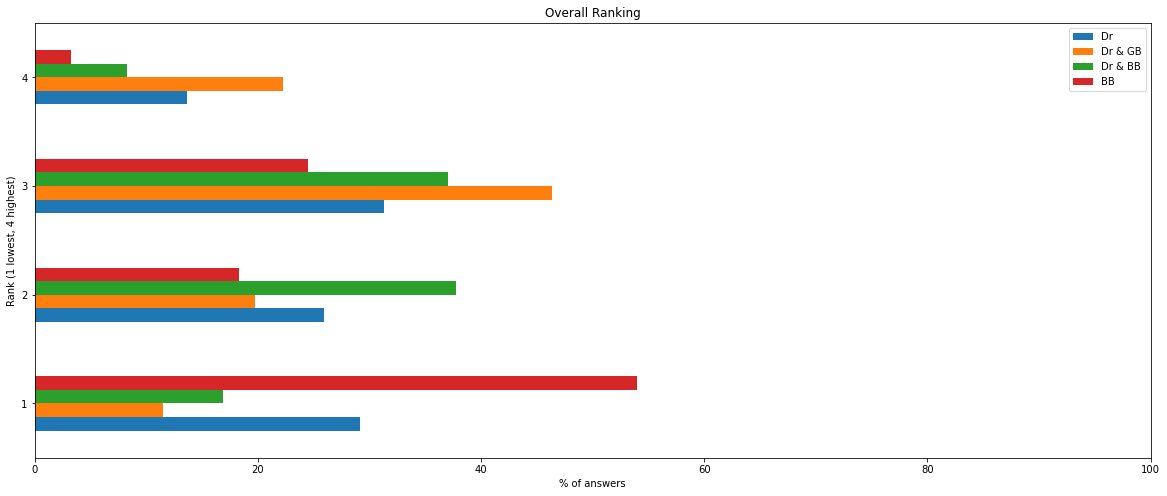

In [88]:
ax = value_c.plot.barh(title='Overall Ranking')
ax.set_xlabel('% of answers')
ax.set_ylabel('Rank (1 lowest, 4 highest)')
ax.set_xlim(0, 100)
ax

### Demographics

In [89]:
def sub_frame_for(column, value):
    indices = raw_data[column].loc[lambda x: x == value].index
    return ranked_df.iloc[indices]


def ranking_for(column, value):
    ranking = sub_frame_for(column, value)
    number_of_answers = ranking.shape[0]
    ranking = ranking.apply(pd.Series.value_counts)
    return ranking.apply(lambda x: (x/number_of_answers)*100)


def bar_chart_for(column, value, title, axes):
    ranking = ranking_for(column, value)
    ax = ranking.plot.barh(title=title, ax=axes)
    ax.set_xlabel('% of answers')
    ax.set_ylabel('Rank (1 lowest, 4 highest)')
    ax.set_xlim(0, 100)


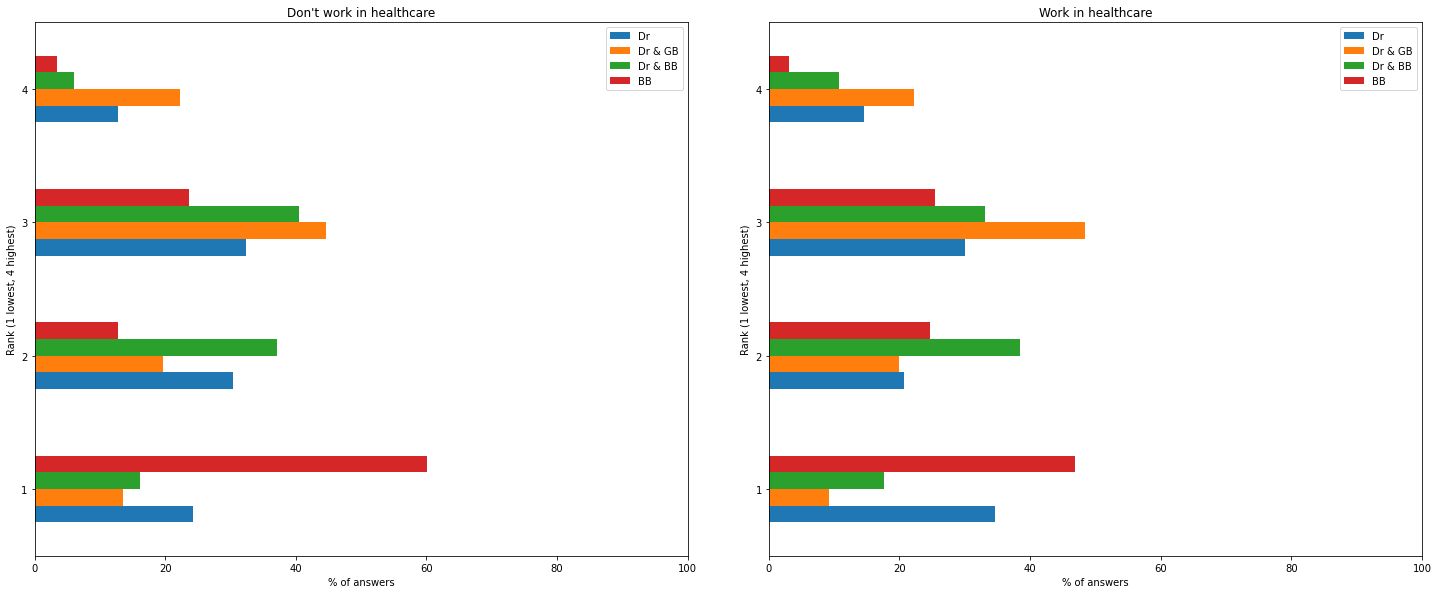

In [90]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 8]
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(h_pad=5, w_pad=5)

bar_chart_for(health, 'No', 'Don\'t work in healthcare', axes[0])
bar_chart_for(health, 'Yes', 'Work in healthcare', axes[1])


In [91]:
# binning ai experience into 3 bins:
# Categories (3, interval[float64, right]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]
ai_binned = 'ai-binned'
raw_data[ai_binned] = pd.cut(x=raw_data[ai], bins=3, labels=[0,1,2])
raw_data

,ID,Start time,Completion time,Healthcare,Highstake,AI Experience,Dr,Dr & GB,Dr & BB,BB,ai-binned
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,2,10,10,7,5,0
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,1,9,10,9,7,0
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,6,8,7,8,9,1
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,2,8,4,2,1,0
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,7,7,8,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,1,8,8,9,1,0
274,283,4/4/22 13:27:33,4/4/22 13:30:57,Yes,8,1,9,10,9,9,0
275,284,4/5/22 16:17:35,4/5/22 16:21:40,Yes,5,1,8,9,8,9,0
276,285,4/5/22 16:20:16,4/5/22 16:24:18,No,7,4,7,8,6,6,0


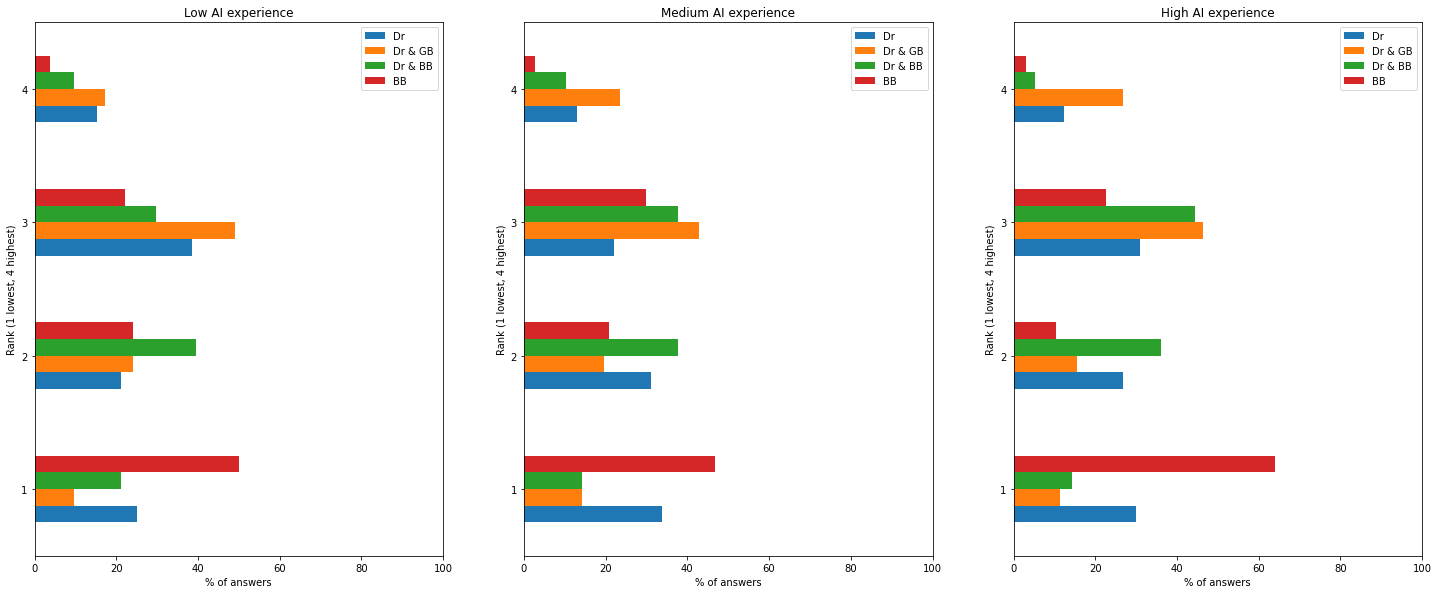

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=5, w_pad=5)
bar_chart_for(ai_binned, 0, 'Low AI experience', axes[0])
bar_chart_for(ai_binned, 1, 'Medium AI experience', axes[1])
bar_chart_for(ai_binned, 2, 'High AI experience', axes[2])

In [93]:
# Highstakes binned
# binning highstakes experience into 3 bins:
# Categories (3, interval[float64, right]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]
highstakes_binned = 'highstakes-binned'
raw_data[highstakes_binned] = pd.cut(x=raw_data[highstakes], bins=3, labels=[0,1,2])
raw_data

,ID,Start time,Completion time,Healthcare,Highstake,AI Experience,Dr,Dr & GB,Dr & BB,BB,ai-binned,highstakes-binned
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,2,10,10,7,5,0,1
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,1,9,10,9,7,0,0
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,6,8,7,8,9,1,1
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,2,8,4,2,1,0,2
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,7,7,8,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,1,8,8,9,1,0,1
274,283,4/4/22 13:27:33,4/4/22 13:30:57,Yes,8,1,9,10,9,9,0,2
275,284,4/5/22 16:17:35,4/5/22 16:21:40,Yes,5,1,8,9,8,9,0,1
276,285,4/5/22 16:20:16,4/5/22 16:24:18,No,7,4,7,8,6,6,0,1


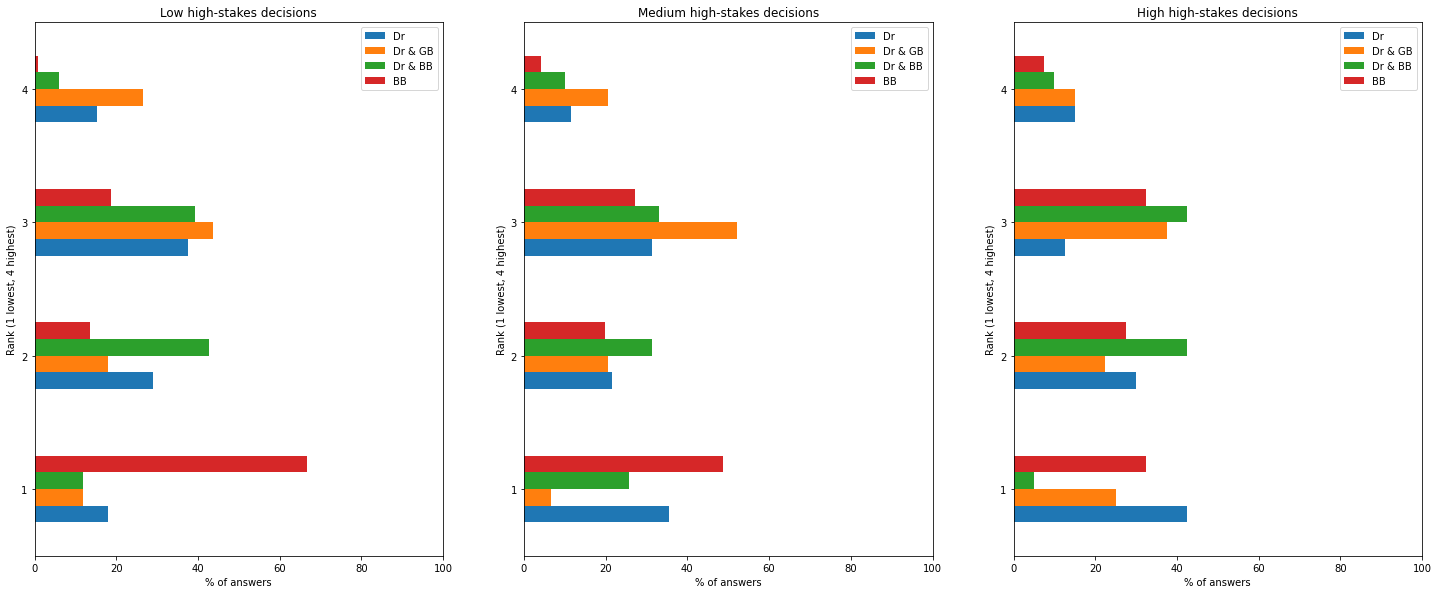

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=5, w_pad=5)
bar_chart_for(highstakes_binned, 0, 'Low high-stakes decisions', axes[0])
bar_chart_for(highstakes_binned, 1, 'Medium high-stakes decisions', axes[1])
bar_chart_for(highstakes_binned, 2, 'High high-stakes decisions', axes[2])


### Ties

In [95]:
unique_ranking = ranked_df.nunique(axis=1)
unique_ranking.value_counts()

2    115
3    105
4     49
1      9
dtype: int64